# SQLAlchemy Homework - OVERVIEW
## Get the Data
1. Import Dependencies
2. Reflect Tables into SQL Alchemy ORM
3. Data exploration.


## Precipitation Analysis
    1.  Design a query to retrieve the last 12 months of precipitation data.
    2.  Select only the `date` and `prcp` values.
    3.  Load the query results into a Pandas DataFrame and set the index to the date column.
    4.  Sort the DataFrame values by `date`.
    5.  Plot the results using the DataFrame `plot` method.
    6.  Use Pandas to print the summary statistics for the precipitation data.
    

## Precipitation Analysis
1. Design a query to calculate the total number of stations.
2. Design a query to find the most active stations.
  * List the stations and observation counts in descending order.
  * Which station has the highest number of observations?
  * Hint: You will need to use a function such as `func.min`, `func.max`, `func.avg`, and `func.count` in your queries.
3. Design a query to retrieve the last 12 months of temperature observation data (TOBS).
  * Filter by the station with the highest number of observations.
  * Plot the results as a histogram with `bins=12`.

# <u>Get the Data</u>
### Import dependencies

In [130]:
# Dependenacies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime as dt

In [131]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [132]:
import numpy as np
import pandas as pd

In [133]:
# needed for date manipulation
# needed for string manipulaiton
import datetime as dt
import string

In [134]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [135]:
###    Formats data from a a single station
def unpack(stat_id, num_ob, temp_max, temp_low, temp_ave):
    print(f' Station ID:        {stat_id}')
    print(f' # observaitons:    {num_ob}')
    print(f' High temprature:   {temp_max} Fahrenheit')
    print(f' Low temprature:    {temp_low} Fahrenheit')
    print(f' Ave temprature:    {round(temp_ave,1)} Fahrenheit')
    return

### Reflect Tables into SQLAlchemy ORM

In [136]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [137]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [138]:
# use inspector to get table names
inspector = inspect(engine)
table_list=inspector.get_table_names()
table_list

['measurement', 'station']

In [139]:
# evaluation for inspecting tables
print("--------------------------")
for table in table_list:
    columns = inspector.get_columns(table)
    print(f'Table name:     {table}\n')
    for c in columns:
        print(c['name'],c["type"])
    print("--------------------------")

--------------------------
Table name:     measurement

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
--------------------------
Table name:     station

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT
--------------------------


In [140]:
# Map Station class
STAT = Base.classes.station

# Map Measurement class
MEASUR = Base.classes.measurement

In [141]:
session = Session(bind=engine)

<h1><u>DATA EXPLORATION</u><h1>
In addition to starter code.

<h3><u><i>Goal</i></u></h3>

***1) Get a general sense of what the data looks like***

***2) Identifuy data problems (i.i. nan)***

***3) Clean up data. If neccessary***

***4) Get a sense of metrics to benchmark work***

In [155]:
# Exploring data set 
station_id_data = session.query(STAT.station, STAT.name, STAT.elevation).all()
station_id_df = pd.DataFrame(station_id_data)
station_id_df

,station,name,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",3.0
1,USC00513117,"KANEOHE 838.1, HI US",14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",7.0
3,USC00517948,"PEARL CITY, HI US",11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",19.5
6,USC00519281,"WAIHEE 837.5, HI US",32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",152.4


# FIX DATE ISSUE -DELETE COMMIT before turning in

In [158]:
# Exploring dates 
# Finding last date
last_day = session.query(MEASUR.date).order_by(MEASUR.date.desc()).first()

###########           Dates calculations                ############################
# Query for the Dow closing price for `CSCO` 1 week before `2011-04-08` using the datetime library

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(f'Date to star query:                 {query_date}')
print(f'Last date of observable data:       {last_day}')

Date to star query:                 2016-08-23
Last date of observable data:       ('2017-08-23',)


In [159]:
# Exploring Data set RAW DATA there are NAN
date_count =  session.query(MEASUR.date).count()
station_countS= session.query(STAT.station).count()
pecip_count = session.query(MEASUR.prcp).count()
station_countM= session.query(MEASUR.station).count()

print(f'Number of Stations (table s): {station_countS}\nNumber of Stations (table m): {station_countM}\nNumber of Dates: {date_count}\nNumber of Preciptation observations {pecip_count}')

Number of Stations (table s): 9
Number of Stations (table m): 19550
Number of Dates: 19550
Number of Preciptation observations 19550


In [160]:
#    idnetifiy the number of observations of precipitation data for the last 12 months. Does incluce NAN
precip_12months = session.query(MEASUR).\
    filter(MEASUR.date > query_date).count()
precip_12months

2223

In [161]:
###############################################################
###############################################################
########             All DATA
# GET a sense of the data by making a compoist dataframe  
# Build a compoist dataframe with crtical info
# get rid of na
core_info = session.query(STAT.name, STAT.station, MEASUR.station, MEASUR.tobs, 
                          MEASUR.prcp,MEASUR.date, STAT.latitude , 
                          STAT.longitude, STAT.elevation).all()
core_last_year_stats_df = pd.DataFrame(core_info).dropna()
core_last_year_stats_df

,name,station,station,tobs,prcp,date,latitude,longitude,elevation
0,"WAIKIKI 717.2, HI US",USC00519397,USC00519397,65.0,0.08,2010-01-01,21.2716,-157.8168,3.0
1,"WAIKIKI 717.2, HI US",USC00519397,USC00519397,63.0,0.00,2010-01-02,21.2716,-157.8168,3.0
2,"WAIKIKI 717.2, HI US",USC00519397,USC00519397,74.0,0.00,2010-01-03,21.2716,-157.8168,3.0
3,"WAIKIKI 717.2, HI US",USC00519397,USC00519397,76.0,0.00,2010-01-04,21.2716,-157.8168,3.0
5,"WAIKIKI 717.2, HI US",USC00519397,USC00519397,70.0,0.06,2010-01-07,21.2716,-157.8168,3.0
...,...,...,...,...,...,...,...,...,...
175943,"MANOA LYON ARBO 785.2, HI US",USC00516128,USC00516128,72.0,0.13,2017-08-17,21.3331,-157.8025,152.4
175945,"MANOA LYON ARBO 785.2, HI US",USC00516128,USC00516128,71.0,0.09,2017-08-19,21.3331,-157.8025,152.4
175947,"MANOA LYON ARBO 785.2, HI US",USC00516128,USC00516128,76.0,0.56,2017-08-21,21.3331,-157.8025,152.4
175948,"MANOA LYON ARBO 785.2, HI US",USC00516128,USC00516128,76.0,0.50,2017-08-22,21.3331,-157.8025,152.4


# <u>Precipitation Analysis</u>

In [162]:
#############           Objectives from starter code
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data


# THIS section tries to fix a date issue

In [163]:
###########           Dates calculations                ############################
# Final goal: Calculate the date 1 year ago from the last data point in the database


# First identifiy last date in data set
last_day = session.query(MEASUR.date).order_by(MEASUR.date.desc()).first()
last_day

print(f"Last day of the datas set is: {last_day}")

last_day_dalc = ','.join(last_day)
print(f"Cleaned up data effort 1 join:     {last_day_dalc}")

last_day_x = last_day_dalc.split('-')
print(f"Cleaned up data effort 2 split:     {last_day_x}")

last_day_x = ','.join(last_day_x)
print(f"Cleaned up data effort 3:     {last_day_x}")
# can't get rid of the zero
# try drop "0" next

Last day of the datas set is: ('2017-08-23',)
Cleaned up data effort 1 join:     2017-08-23
Cleaned up data effort 2 split:     ['2017', '08', '23']
Cleaned up data effort 3:     2017,08,23


In [164]:
temp_b = str(last_day).split(' ').pop(0)
temp_b

"('2017-08-23',)"

In [165]:
last_day = temp_b.translate(str.maketrans('', '', string.punctuation))
last_day

'20170823'

In [166]:
last_day_x
res = [ele.lstrip('0') for ele in last_day_x] 
str(res)

"['2', '', '1', '7', ',', '', '8', ',', '2', '3']"

# <u> WORKS AFTER THIS POINT
    
<i>Had to hardcode the last date

In [167]:
###########           Dates calculations  final goal              ############################
# Query for last day and first day on new data set
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(f"Last day of data set:   {last_day_dalc}")
print(f"Start of data set:      {query_date}")

Last day of data set:   2017-08-23
Start of data set:      2016-08-23


In [177]:
################################################################
#################################################################
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_year_precip = session.query(MEASUR.date, MEASUR.prcp).\
    filter(MEASUR.date > query_date).all()
#####################################
# Hashed out for clarity
#last_year_precip

In [178]:
#####################################################################################
####################################################################################
# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_precip_df = pd.DataFrame(last_year_precip)
# Sort the dataframe by date
last_year_precip_df = last_year_precip_df.sort_values('date')
last_year_precip_df = last_year_precip_df.set_index("date")
# removo na
last_year_precip_df = last_year_precip_df.dropna()
last_year_precip_df

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


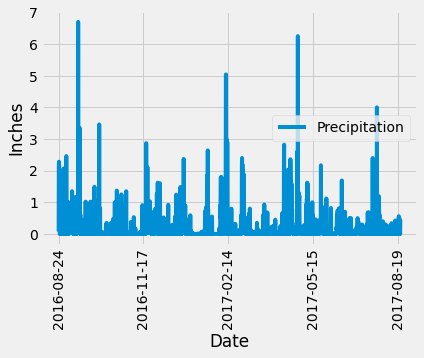

In [179]:
#############################################
################################################
#Plot the results using the DataFrame plot method.
df = last_year_precip_df
df.plot()
plt.xticks(rotation=90, horizontalalignment="center")
plt.xlabel("Date")


plt.ylabel("Inches")
plt.legend(["Precipitation"])
#plt.tight_layout()
plt.show()

In [175]:
######################################
######################################
# Use Pandas to calcualte the summary statistics for the precipitation data
stats_2017df = last_year_precip_df.describe()
stats_2017df

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [180]:
######################################
######################################
# Use Pandas to calcualte the summary statistics for the precipitation data

pmean = round(last_year_precip_df['prcp'].mean(),3)
pmedian = round(last_year_precip_df['prcp'].median(),3)


pstd = round(last_year_precip_df['prcp'].std(),3)
pmax = round(last_year_precip_df['prcp'].max(),3)
pmin =round(last_year_precip_df['prcp'].min(),3)
count = last_year_precip_df['prcp'].count()

pmode =last_year_precip_df['prcp'].mode()

print(f'Rainfall data for 2017-08 to 2016-08')
print(f"**************************************")
print(f'Average Rainfall:              {pmean}\n')
print(f'Median Rainfall:               {pmedian}\n')
print(f'STD Rainfall:                  {pstd}\n')
print(f'MAX Rainfall:                  {pmax}\n')
print(f'MIN Rainfall:                  {pmin}\n')
print(f'Observation Count Rainfall:    {count}\n')

Rainfall data for 2017-08 to 2016-08
**************************************
Average Rainfall:              0.176

Median Rainfall:               0.02

STD Rainfall:                  0.46

MAX Rainfall:                  6.7

MIN Rainfall:                  0.0

Observation Count Rainfall:    2015



# <u>Station Analysis</u>

In [181]:
# Design a query to show how many stations are available in this dataset?
station_count =  session.query(STAT.name).count()
station_names = session.query(STAT.name).all()
station_identification = session.query(STAT.station).all()

# was performed previoulsy
print(f' Number of weather stations on Hawii {station_count}')
station_id_df

 Number of weather stations on Hawii 9


,station,name,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",3.0
1,USC00513117,"KANEOHE 838.1, HI US",14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",7.0
3,USC00517948,"PEARL CITY, HI US",11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",19.5
6,USC00519281,"WAIHEE 837.5, HI US",32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",152.4


In [182]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

###############################################################
########  comparing precipitation vrs temprature
########   A quick loook

dat = [MEASUR.station, 
       func.count(MEASUR.prcp), 
       func.count(MEASUR.tobs)] 

obs_counts = session.query(*dat).\
    group_by(MEASUR.station).\
    order_by(MEASUR.tobs).all()
obs_counts
######### Temprautre has more observations
########## precipitation has nan

[('USC00519397', 2685, 2724),
 ('USC00511918', 1932, 1979),
 ('USC00513117', 2696, 2709),
 ('USC00514830', 1937, 2202),
 ('USC00519281', 2772, 2772),
 ('USC00518838', 342, 511),
 ('USC00516128', 2484, 2612),
 ('USC00517948', 683, 1372),
 ('USC00519523', 2572, 2669)]

In [183]:
############################################
############################################
######   Temprature was used to identify the most active stations.

# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
dat = [MEASUR.station,
       func.count(MEASUR.tobs),
      func.max(MEASUR.tobs),
      func.min(MEASUR.tobs),
      func.avg(MEASUR.tobs)] 

obs_counts = session.query(*dat).\
    group_by(MEASUR.station).\
    order_by(func.count(MEASUR.tobs).desc()).all()
#obs_counts

In [71]:
############################################
############################################
#  Same as above with labels
print(f"Most active statons high to low\n")
print(f"Total number of stations {len(obs_counts)}")
print(f"********************************")
print(f"********************************")
for obs in obs_counts:
    unpack(*obs)
    print(f"********************************")

Most active statons high to low

Total number of stations 9
********************************
********************************
 Station ID:        USC00519281
 # observaitons:    2772
 High temprature:   85.0 Fahrenheit
 Low temprature:    54.0 Fahrenheit
 Ave temprature:    71.7 Fahrenheit
********************************
 Station ID:        USC00519397
 # observaitons:    2724
 High temprature:   87.0 Fahrenheit
 Low temprature:    56.0 Fahrenheit
 Ave temprature:    74.6 Fahrenheit
********************************
 Station ID:        USC00513117
 # observaitons:    2709
 High temprature:   85.0 Fahrenheit
 Low temprature:    59.0 Fahrenheit
 Ave temprature:    72.7 Fahrenheit
********************************
 Station ID:        USC00519523
 # observaitons:    2669
 High temprature:   85.0 Fahrenheit
 Low temprature:    56.0 Fahrenheit
 Ave temprature:    74.5 Fahrenheit
********************************
 Station ID:        USC00516128
 # observaitons:    2612
 High temprature:   84.0 

In [97]:
############################################
############################################

#     Anserwer to a question

# Sequester most active station for all KNOWN DATA.

# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

# Calculates the stats for the most active station Stats Using query
dat = [MEASUR.station,
       func.count(MEASUR.tobs),
      func.max(MEASUR.tobs),
      func.min(MEASUR.tobs),
      func.avg(MEASUR.tobs)] 

most_active_station = session.query(*dat).\
    group_by(MEASUR.station).\
    order_by(func.count(MEASUR.tobs).desc()).first()

#unpack(*most_active_station)


most_active_station

('USC00519281', 2772, 85.0, 54.0, 71.66378066378067)

In [190]:
# REDUECE data to single station
temp_a = str(most_active_station).split(' ').pop(0)
active_station = temp_a.translate(str.maketrans('', '', string.punctuation))
active_station

'USC00519281'

In [189]:
############################################
############################################

#     Anserwer to a question

# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

# Calculates the stats for the most active station Stats Using query
dat = [MEASUR.station,
       func.count(MEASUR.tobs),
      func.max(MEASUR.tobs),
      func.min(MEASUR.tobs),
      func.avg(MEASUR.tobs)] 

most_active_stats = session.query(*dat).\
    filter(MEASUR.station == active_station).\
    filter(func.strftime(MEASUR.date) > query_date).\
    group_by(MEASUR.station).\
    order_by(func.count(MEASUR.tobs).desc()).first()

print(f' One year of statistical data for the most active station: {active_station}\n')
unpack(*most_active_stats)

#most_active_stats

 One year of statistical data for the most active station: USC00519281

 Station ID:        USC00519281
 # observaitons:    351
 High temprature:   83.0 Fahrenheit
 Low temprature:    59.0 Fahrenheit
 Ave temprature:    73.1 Fahrenheit


In [101]:
##########################################################################
########### GENERAL SNAP SHOT OF THE ISLAND           ####################

#           EXTRA Same as above but with pandas
#           Confirms work is correct
#           also provides all data related to a station

########## Convert to datafram to visualize data from previous query
#########  Create a snap shot of iland data
station_stats_df = pd.DataFrame(obs_counts,columns=['station','#temp observed','temp max', 
                                    'temp min', 'temp ave'])
############################################################################
######### Idenifies the most active station by # of temps observed
######### Merges two panda dataframes that were both constructed by querue funcitons
act_station = pd.merge(station_stats_df, station_id_df, on='station', how='outer')
act_station

,station,#temp observed,temp max,temp min,temp ave,name,elevation
0,USC00519281,2772,85.0,54.0,71.663781,"WAIHEE 837.5, HI US",32.9
1,USC00519397,2724,87.0,56.0,74.553231,"WAIKIKI 717.2, HI US",3.0
2,USC00513117,2709,85.0,59.0,72.689184,"KANEOHE 838.1, HI US",14.6
3,USC00519523,2669,85.0,56.0,74.543649,"WAIMANALO EXPERIMENTAL FARM, HI US",19.5
4,USC00516128,2612,84.0,58.0,70.915008,"MANOA LYON ARBO 785.2, HI US",152.4
5,USC00514830,2202,85.0,58.0,74.873297,"KUALOA RANCH HEADQUARTERS 886.9, HI US",7.0
6,USC00511918,1979,87.0,53.0,71.615968,"HONOLULU OBSERVATORY 702.2, HI US",0.9
7,USC00517948,1372,87.0,58.0,74.684402,"PEARL CITY, HI US",11.9
8,USC00518838,511,83.0,58.0,72.724070,"UPPER WAHIAWA 874.3, HI US",306.6


In [186]:
#Data frame with stats from most active station recording the most data.
#### confirms data from above
most_act_station_stats= act_station.head(1)
# Calculates the stats for the most active station Stats Using query in Data frame
print(f"The Station with the most observed temprature data is: {most_act_station}")
most_act_station_stats

The Station with the most observed temprature data is: USC00519281


,station,#temp observed,temp max,temp min,temp ave,name,elevation
0,USC00519281,2772,85.0,54.0,71.663781,"WAIHEE 837.5, HI US",32.9


In [191]:
############################################
############################################

#     Anserwer to a question

# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_dat = [MEASUR.station,
           MEASUR.tobs,MEASUR.date] 

temp_data = session.query(*temp_dat).\
    filter(MEASUR.date > query_date).\
    filter(MEASUR.station == most_act_station)
    
waik_df = pd.DataFrame(temp_data)
#waik_df

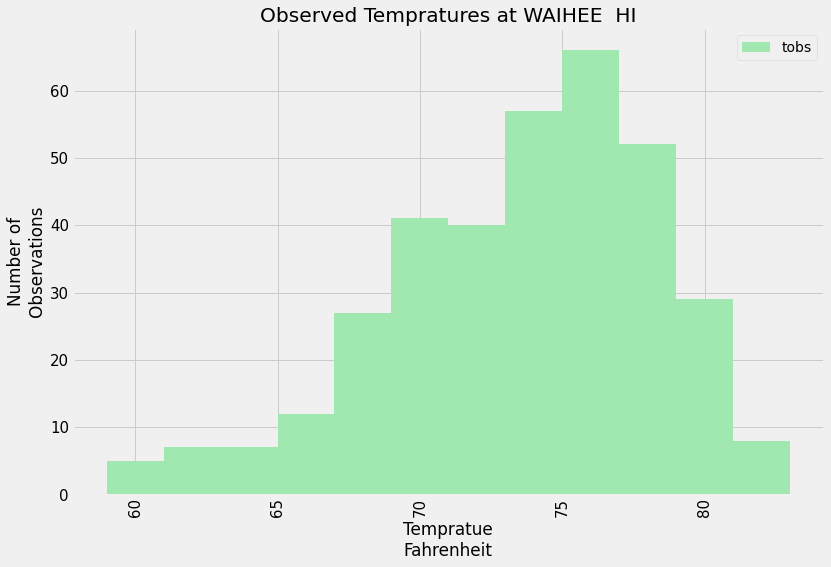

In [192]:
############################################
############################################

#     Anserwer to a question

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
waik_df.plot(kind='hist',
        alpha=1.0,
        bins=12,
        title='Observed Tempratures at WAIHEE  HI',
        rot=90,
        grid=True,
        figsize=(12,8),
        fontsize=15,
        legend ='temp',
        color=['#A0E8AF'])
plt.xlabel('Tempratue\nFahrenheit')
plt.ylabel("Number of\nObservations");

In [193]:
waik_df.describe()

,tobs
count,351.000000
mean,73.096866
std,4.735491
min,59.000000
25%,70.000000
50%,74.000000
75%,77.000000
max,83.000000


In [194]:
waik_df

,station,tobs,date
0,USC00519281,77.0,2016-08-24
1,USC00519281,80.0,2016-08-25
2,USC00519281,80.0,2016-08-26
3,USC00519281,75.0,2016-08-27
4,USC00519281,73.0,2016-08-28
...,...,...,...
346,USC00519281,77.0,2017-08-14
347,USC00519281,77.0,2017-08-15
348,USC00519281,76.0,2017-08-16
349,USC00519281,76.0,2017-08-17


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
